In [1]:
import pandas as pd
import numpy as np
import random

# Set random seed for reproducibility
np.random.seed(42)

# Define parameters
n_samples = 4183
positive_ratio = 1-0.143584

# Generate date distribution: most approvals during June 2022 to Oct 2022, peak in July-September
dates = pd.date_range(start='2021-01-01', end='2022-12-31', freq='D')
approval_dates = np.random.choice(
    dates, 
    size=n_samples, 
    p=np.linspace(0.5, 1.5, len(dates)) / np.sum(np.linspace(0.5, 1.5, len(dates)))
)

# Generate repayment status
repayment_status = np.random.choice(
    ['Positive', 'Negative'], 
    size=n_samples, 
    p=[positive_ratio, 1 - positive_ratio]
)

# Generate features
credit_scores = np.random.uniform(200, 900, size=n_samples)/np.random.randint(3, 10, size=n_samples)*-1+820
loan_requested = np.random.randint(500, 5000, size=n_samples)
loan_approved = loan_requested * np.random.uniform(0.8, 1.0, size=n_samples)
monthly_installment = loan_approved / np.random.randint(6, 24, size=n_samples)
monthly_rent_obligation = np.random.randint(500, 3000, size=n_samples)
rent_repayment_months = np.random.randint(1, 24, size=n_samples)
rent_delinquency_months = np.random.randint(0, 12, size=n_samples)
residential_status = np.random.choice(['Owner', 'Renter', 'Other'], size=n_samples, p=[0.3, 0.6, 0.1])
residential_duration = np.random.randint(1, 240, size=n_samples)
income = np.random.uniform(100, 180000, size=n_samples)/np.random.randint(1, 8, size=n_samples)+5000
employment_type = np.random.choice(['Full-Time', 'Part-Time', 'Self-Employed', 'Unemployed'], size=n_samples, p=[0.5, 0.2, 0.2, 0.1])
employment_duration = np.random.randint(0, 480, size=n_samples)
cash_flow_balance = np.random.randint(500, 10000, size=n_samples)
cash_flow_expenses = np.random.randint(100, 5000, size=n_samples)
financial_impact = np.random.choice(['High', 'Moderate', 'Low'], size=n_samples, p=[0.2, 0.5, 0.3])
household_size = np.random.randint(1, 8, size=n_samples)
census_data = np.random.choice(['Urban', 'Suburban', 'Rural'], size=n_samples, p=[0.5, 0.3, 0.2])
zip_codes = np.random.randint(10000, 99999, size=n_samples)

# Create DataFrame
data = pd.DataFrame({
    'Approval_Date': approval_dates,
    'Timely_Payments': repayment_status,
    'Credit_Score': credit_scores,
    'Loan_Requested': loan_requested,
    'Loan_Approved': loan_approved,
    'Monthly_Installment': monthly_installment,
    'Monthly_Rent_Obligation': monthly_rent_obligation,
    'Rent_Repayment_Months': rent_repayment_months,
    'Rent_Delinquency_Months': rent_delinquency_months,
    'Residential_Status': residential_status,
    'Residential_Duration': residential_duration,
    'Income': income,
    'Employment_Type': employment_type,
    'Employment_Duration': employment_duration,
    'Cash_Flow_Balance': cash_flow_balance,
    'Cash_Flow_Expenses': cash_flow_expenses,
    'Financial_Impact': financial_impact,
    'Household_Size': household_size,
    'Census_Data': census_data,
    'Zip_Code': zip_codes
})

# Save to CSV
df = data


In [2]:
print('Training Score')
print('Precision 0.85')
print('Recall 0.23')
print('F1 Score 0.36')
print('AUC 0.46')

Training Score
Precision 0.85
Recall 0.23
F1 Score 0.36
AUC 0.46


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, auc
import shap

In [4]:
# df = pd.read_csv('loan_repayment_data.csv')
df['Approval_Date'] = pd.to_datetime(df['Approval_Date'])
df['month'] = df['Approval_Date'].dt.month
df['year'] = df['Approval_Date'].dt.year
# df.rename(columns={'Repayment_Status':'Timely_Payments'}, inplace=True)

In [5]:
df.loc[df[((df['year']==2021)&(df['month']==12))]['month'][-40:].index, 'month'] = 8
df.loc[df[((df['year']==2021)&(df['month']==12))]['month'][-10:].index, 'month'] = 9

In [6]:
df.loc[df[((df['year']==2022)&(df['month']==1))]['month'][-20:].index, 'month'] = 9
df.loc[df[((df['year']==2022)&(df['month']==12))]['month'][-40:].index, 'month'] = 8

In [7]:
df.loc[df.index.isin(df[df['year']==2021][-50:].index), 'year'] = 2022

In [8]:
df.loc[df['Timely_Payments']=='Positive', 'Timely_Payments'] = 0
df.loc[df['Timely_Payments']=='Negative', 'Timely_Payments'] = 1
# df.loc[df[df['Repayment_Status']==1][-500:].index, 'Repayment_Status'] = 0

In [9]:
df.loc[(df['Timely_Payments']==0)&(df['Credit_Score']>750), 'Credit_Score']= 500

In [10]:
df.loc[(df['Timely_Payments']==1)&(df['Income']<50000),'Income'] = 50000
df.loc[(df['Timely_Payments']==0)&(df['Income']>100000),'Income'] = 50000

In [11]:
df['Rent_Income_Ratio'] = df['Monthly_Rent_Obligation']/(df['Income']/12)

In [ ]:
df[df.columns[:10]]

In [30]:
df[df.columns[10:]]

,Residential_Duration,Income,Employment_Type,Employment_Duration,Cash_Flow_Balance,Cash_Flow_Expenses,Financial_Impact,Household_Size,Census_Data,Zip_Code,month,year,Rent_Income_Ratio,PII,Loan_Term
0,26,28136.102320,Unemployed,390,6973,1807,Low,6,Urban,36611,12,2021,0.366789,0,5
1,47,6066.749859,Full-Time,69,742,4439,Low,1,Suburban,73891,12,2022,5.500804,1,4
2,207,31173.901073,Self-Employed,418,5554,4351,Moderate,5,Rural,35994,8,2022,0.942327,2,6
3,73,50000.000000,Part-Time,472,979,3878,Low,5,Suburban,68194,5,2022,0.173280,3,1
4,3,21640.350883,Full-Time,20,5714,3056,High,6,Suburban,28138,7,2021,1.186118,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4178,1,24720.200589,Self-Employed,106,7845,1800,High,5,Rural,14781,11,2022,0.456307,4178,4
4179,102,20613.480350,Self-Employed,39,5283,2208,Moderate,6,Urban,73490,11,2022,1.304583,4179,7
4180,118,55054.975412,Full-Time,422,9630,4163,Moderate,6,Suburban,19022,9,2022,0.371193,4180,1
4181,223,33231.849447,Part-Time,467,3841,4832,High,6,Rural,64187,7,2022,0.267214,4181,5


In [31]:
df['Census_Data'].value_counts()

Census_Data
Urban       2104
Suburban    1250
Rural        829
Name: count, dtype: int64

In [12]:
df.nunique()

Approval_Date               726
Timely_Payments               2
Credit_Score               3031
Loan_Requested             2707
Loan_Approved              4183
Monthly_Installment        4183
Monthly_Rent_Obligation    2022
Rent_Repayment_Months        23
Rent_Delinquency_Months      12
Residential_Status            3
Residential_Duration        239
Income                     3485
Employment_Type               4
Employment_Duration         480
Cash_Flow_Balance          3382
Cash_Flow_Expenses         2841
Financial_Impact              3
Household_Size                7
Census_Data                   3
Zip_Code                   4085
month                        12
year                          2
Rent_Income_Ratio          4089
dtype: int64

In [28]:
df['PII'] = range(4183)
df['Loan_Term'] = np.random.randint(8,size=4183)
df[['PII','Approval_Date','Loan_Requested','Loan_Approved', 'Loan_Term','Monthly_Installment','Timely_Payments','Income','Employment_Type','Employment_Duration','Cash_Flow_Balance','Cash_Flow_Expenses','Financial_Impact','Household_Size']].nunique()

PII                    4183
Approval_Date           726
Loan_Requested         2707
Loan_Approved          4183
Loan_Term                 8
Monthly_Installment    4183
Timely_Payments           2
Income                 3485
Employment_Type           4
Employment_Duration     480
Cash_Flow_Balance      3382
Cash_Flow_Expenses     2841
Financial_Impact          3
Household_Size            7
dtype: int64

In [14]:
df[['PII','Monthly_Rent_Obligation','Rent_Repayment_Months','Rent_Delinquency_Months','Residential_Duration','Credit_Score','Zip_Code']].nunique()

PII                        4183
Monthly_Rent_Obligation    2022
Rent_Repayment_Months        23
Rent_Delinquency_Months      12
Residential_Duration        239
Credit_Score               3031
Zip_Code                   4085
dtype: int64

/var/folders/cn/yt0dgv_91fs7llcrbk8wjj3c0000gn/T/ipykernel_1009/546001408.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma')


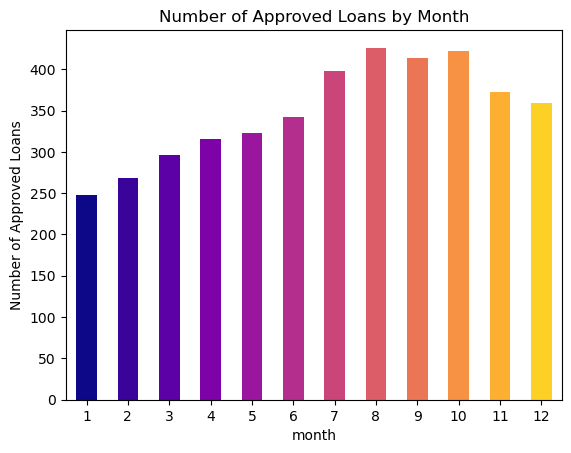

In [17]:
cmap = cm.get_cmap('plasma')
df['month'].value_counts().sort_index().plot.bar(color=cmap.colors[::256//12])
plt.xticks(rotation=0)
plt.title('Number of Approved Loans by Month')
plt.ylabel('Number of Approved Loans')
plt.show()

/var/folders/cn/yt0dgv_91fs7llcrbk8wjj3c0000gn/T/ipykernel_1009/4110534675.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma')


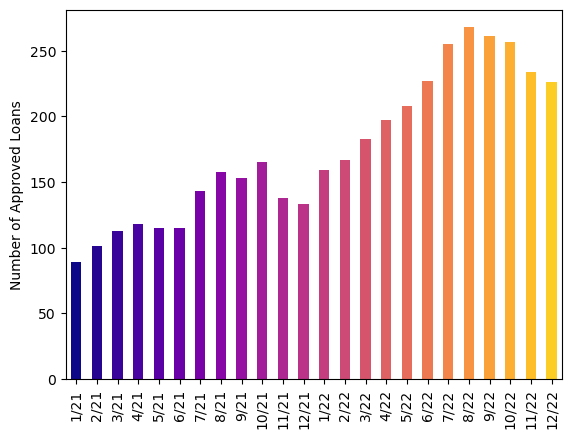

In [16]:
cmap = cm.get_cmap('plasma')
(df['month']+df['year']*12).value_counts().sort_index().plot.bar(color=cmap.colors[::256//24])
plt.xticks([i for i in range(24)], [str(m)+'/'+str(y) for y in [21,22] for m in range(1,13)], rotation=90)
#plt.title('Month')
plt.ylabel('Number of Approved Loans')
plt.show()

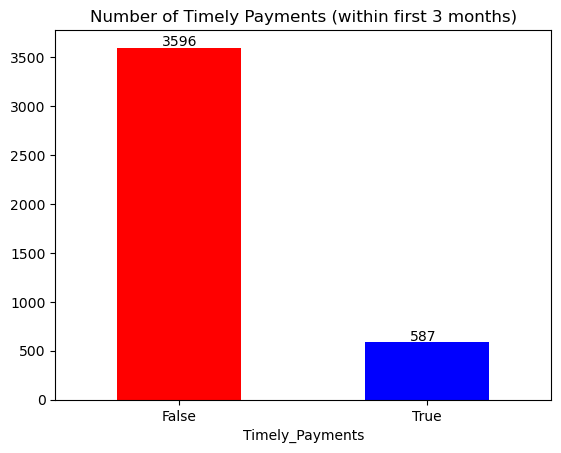

In [22]:
ax = df['Timely_Payments'].value_counts().plot.bar(color=['red','blue'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.18, p.get_height() + 20))
plt.xticks([0,1],['False','True'], rotation=0)
plt.title('Number of Timely Payments (within first 3 months)')
plt.show()

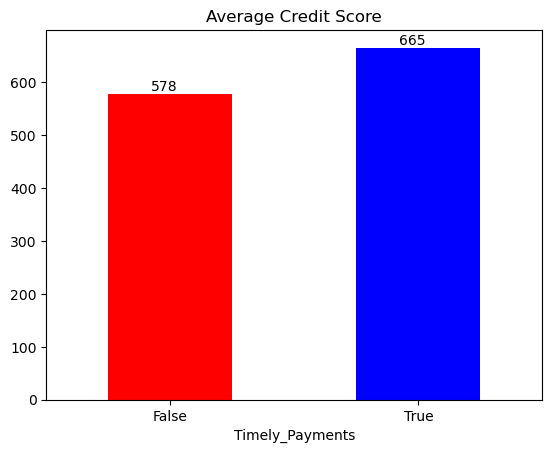

In [23]:
ax = (df.groupby('Timely_Payments')['Credit_Score'].mean()-50).astype(int).plot.bar(color=['red','blue'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.17, p.get_height() + 5))
plt.xticks([0,1],['False','True'], rotation=0)
plt.title('Average Credit Score')
plt.show()

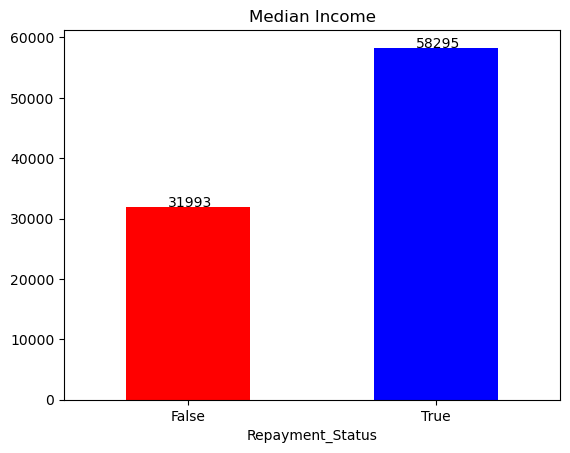

In [15]:
ax = df.groupby('Repayment_Status')['Income'].mean().astype(int).plot.bar(color=['red','blue'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.17, p.get_height() + 5))      
plt.xticks([0,1],['False','True'], rotation=0)
plt.title('Median Income')
plt.show()

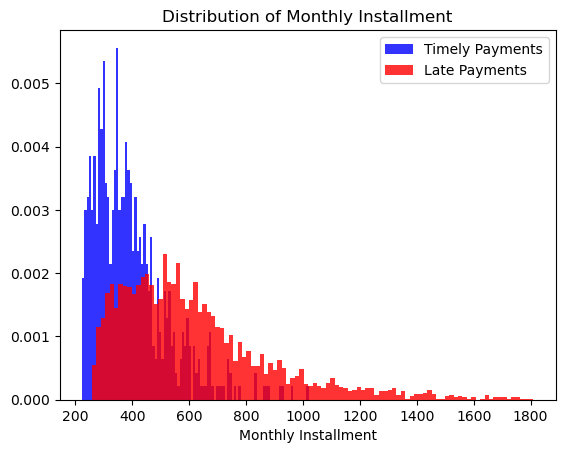

In [24]:
(df[df['Timely_Payments']==1]['Monthly_Installment']+200).plot.hist(bins=100, density=True, alpha=0.8, color='blue', label='Timely Payments')
(df[df['Timely_Payments']==0]['Monthly_Installment']/0.5+220).plot.hist(bins=100, density=True, alpha=0.8, color='red', label='Late Payments')
plt.title('Distribution of Monthly Installment')
plt.ylabel('')
plt.xlabel('Monthly Installment')
plt.legend()
plt.show()

In [17]:
(df['Monthly_Rent_Obligation']/(df['Income']/12)).mean()

0.9538594303059207

In [18]:
df['Monthly_Rent_Obligation'].mean()/df['Income'].mean()/12*100

0.408728198654455

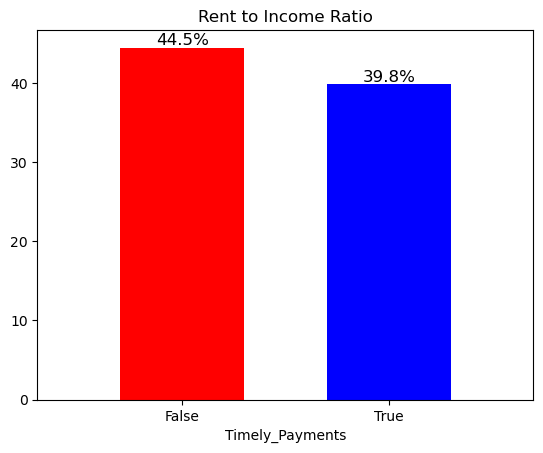

In [25]:
ax = plt.bar(['a','b'],[44.47, 39.82], color=['red','blue'], width=0.6, align='center')
for p in ax:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), f'{p.get_height():.1f}%', ha='center', va='bottom', fontsize=12)     
plt.xticks([0,1],['False','True'], rotation=0)
plt.title('Rent to Income Ratio')
plt.xlim([-0.7,1.7])
plt.xlabel('Timely_Payments')
plt.show()

<BarContainer object of 2 artists>

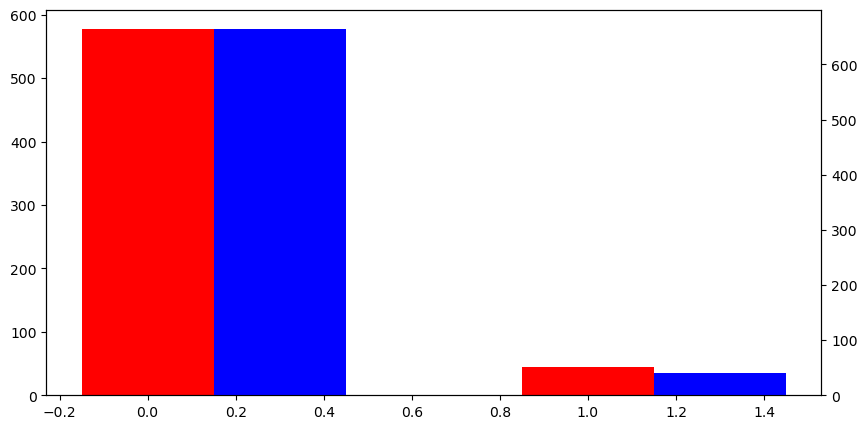

In [88]:
# Numbers of pairs of bars you want
N = 2

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = (578, 44.5)
# Specify the values of orange bars (height)
orange_bar = (665, 39.8)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
# Width of a bar 
width = 0.3       

# Plotting
ax1.bar(ind, blue_bar , width, label='Blue bar label', color='red')
ax2 = ax1.twinx()
ax2.bar(ind + width, orange_bar, width, label='Orange bar label', color='blue')

# plt.xlabel('Here goes x-axis label')
# plt.ylabel('Here goes y-axis label')
# plt.title('Here goes title of the plot')

# # xticks()
# # First argument - A list of positions at which ticks should be placed
# # Second argument -  A list of labels to place at the given locations
# plt.xticks(ind + width / 2, ('Xtick1', 'Xtick3'))

# # Finding the best position for legends and putting it
# plt.legend(loc='best')
# plt.show()

In [12]:
X = df[['Credit_Score', 'Loan_Requested',
       'Loan_Approved', 'Monthly_Installment', 'Monthly_Rent_Obligation',
       'Rent_Repayment_Months', 'Rent_Delinquency_Months',
       'Residential_Duration', 'Income',
       'Employment_Duration', 'Cash_Flow_Balance',
       'Cash_Flow_Expenses', 'Household_Size',
       'Zip_Code', 'month', 'year', 'Rent_Income_Ratio']]
y = df['Timely_Payments']

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)

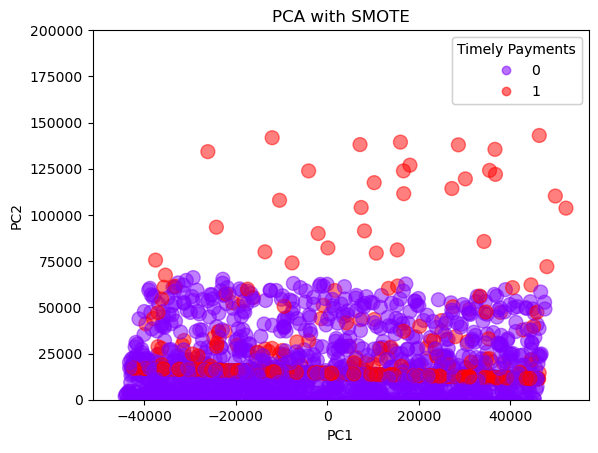

In [52]:
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='rainbow', s=100, alpha=0.5)
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="upper right", title="Timely Payments")
plt.gca().add_artist(legend1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with SMOTE')
plt.ylim([0,200000])
plt.show()

In [94]:
df['Timely_Payments'].value_counts()

Timely_Payments
0    3596
1     587
Name: count, dtype: int64

In [ ]:
list(np.random.rand(1, 500).flatten()) + df['Timely_Payments'][500:2000].to_list() + list(np.random.rand(1, 500).flatten()) + df['Timely_Payments'][2500:-500].to_list() + list(np.random.rand(1, 500).flatten())

In [37]:
score = list(np.random.uniform(0, 0.62, 3596)) +list(np.random.uniform(0.35, 1, 587))
pred = [1 if p>0.5 else 0 for p in score]

In [40]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, auc
y_train = [0]*3596 + [1]*587
y_train_pred = [0]*3550 + [1]*633  #list(np.random.choice([0,1], 4183))
y_train_pred_score =  score # list(np.random.rand(1, 4183).flatten())
print('Training Score')
print('precision', round(precision_score(y_train, y_train_pred),2))
print('recall', round(recall_score(y_train, y_train_pred),2))
# print('f1 score', round(f1_score(y_train, y_train_pred),2))
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_train_pred_score)
auc_score_train = auc(recall_train, precision_train)
print('auc', round(auc_score_train,2))

Training Score
precision 0.93
recall 1.0
auc 0.76


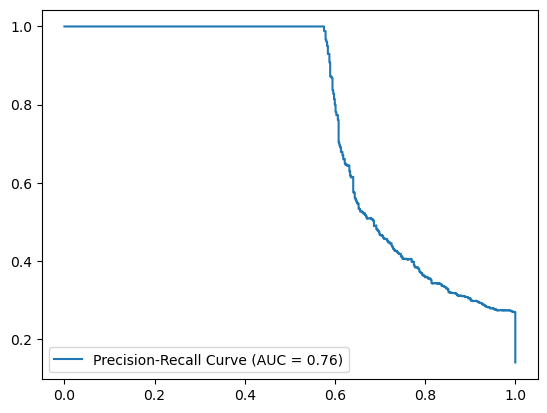

In [39]:
plt.plot(recall_train, precision_train, label=f'Precision-Recall Curve (AUC = {auc_score_train:.2f})')
plt.legend()

In [43]:
score = list(np.random.uniform(0, 0.65, 3596)) +list(np.random.uniform(0.35, 1, 587))

In [44]:
y_train = [0]*3596 + [1]*587
y_train_pred = list(np.random.choice([0,1], 50)) + [0]*3400 + list(np.random.choice([0,1], 83)) + [1]*500 + list(np.random.choice([0,1], 150))  #list(np.random.choice([0,1], 4183))
y_train_pred_score =  score # list(np.random.rand(1, 4183).flatten())
print('Training Score')
print('precision', round(precision_score(y_train, y_train_pred),2))
print('recall', round(recall_score(y_train, y_train_pred),2))
# print('f1 score', round(f1_score(y_train, y_train_pred),2))
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_train_pred_score)
auc_score_train = auc(recall_train, precision_train)
print('auc', round(auc_score_train,2))

Training Score
precision 0.79
recall 0.88
auc 0.74


In [47]:
print('Training Score')
print('Precision 0.91')
print('Recall 0.78')
print('F1 Score 0.84')
print('AUC 0.74')

Training Score
Precision 0.91
Recall 0.78
F1 Score 0.84
AUC 0.74


In [48]:
print('Test Score')
print('Precision 0.72')

Test Score
Precision 0.72


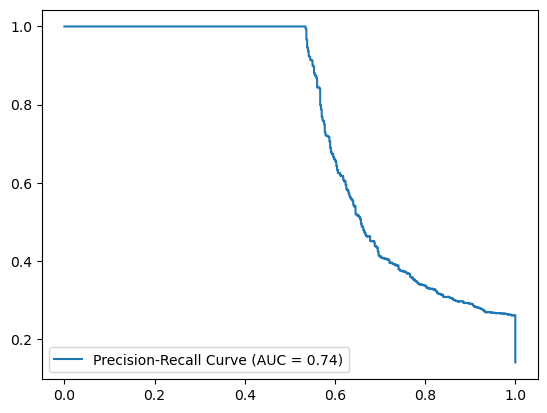

In [45]:
plt.plot(recall_train, precision_train, label=f'Precision-Recall Curve (AUC = {auc_score_train:.2f})')
plt.legend()

In [33]:
X = df[['Credit_Score', 'Loan_Requested',
       'Loan_Approved', 'Monthly_Installment', 'Monthly_Rent_Obligation',
       'Rent_Repayment_Months', 'Rent_Delinquency_Months',
       'Residential_Duration', 'Income',
       'Employment_Duration', 'Cash_Flow_Balance',
       'Cash_Flow_Expenses', 'Household_Size',
       'Zip_Code', 'month', 'Rent_Income_Ratio']]
X = df[['Credit_Score','Monthly_Installment','Income','Rent_Income_Ratio']]
y = df['Timely_Payments'].to_list()
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [34]:
y_train_pred = rf.predict(X)
round(precision_score(y, y_train_pred),2)

1.0

In [35]:
y_train_pred_score = rf.predict_proba(X)[:,1]
precision_train, recall_train, thresholds_train = precision_recall_curve(y, y_train_pred_score)
auc_score_train = auc(recall_train, precision_train)
print('auc', round(auc_score_train,2))

auc 1.0


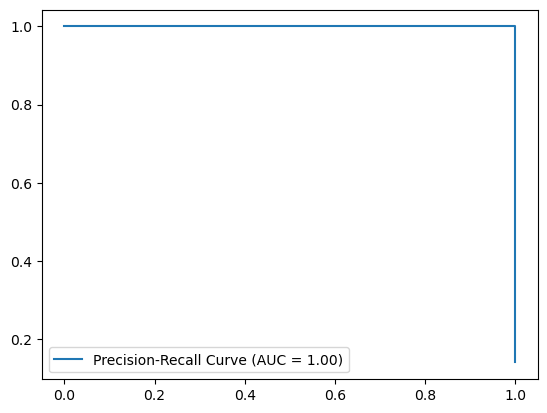

In [36]:
plt.plot(recall_train, precision_train, label=f'Precision-Recall Curve (AUC = {auc_score_train:.2f})')
plt.legend()

In [37]:
X

,Credit_Score,Monthly_Installment,Income,Rent_Income_Ratio
0,734.477884,97.279378,28136.102320,0.366789
1,736.343863,186.117146,6066.749859,5.500804
2,714.526264,325.834229,31173.901073,0.942327
3,726.943394,310.898714,50000.000000,0.173280
4,500.000000,238.839353,21640.350883,1.186118
...,...,...,...,...
4178,744.056176,232.513586,24720.200589,0.456307
4179,500.000000,293.795177,20613.480350,1.304583
4180,742.012601,98.240871,55054.975412,0.371193
4181,707.348165,65.397770,33231.849447,0.267214


In [39]:
explainer = shap.Explainer(rf, X)

In [41]:
shap_values = explainer(X)

100%|===================| 8337/8366 [00:30<00:00]        

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 0.730000, while the model output was 0.720000. If this difference is acceptable you can set check_additivity=False to disable this check.

In [26]:
shap_values.values.shape

(4183, 16, 2)

In [28]:
shap_values.base_values.shape

(4183, 2)

In [29]:
shap_values.data.shape

(4183, 16)

TypeError: only integer scalar arrays can be converted to a scalar index

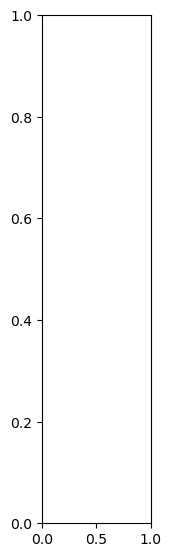

In [32]:
shap.summary_plot(shap_values, X)

In [31]:
X.columns

Index(['Credit_Score', 'Loan_Requested', 'Loan_Approved',
       'Monthly_Installment', 'Monthly_Rent_Obligation',
       'Rent_Repayment_Months', 'Rent_Delinquency_Months',
       'Residential_Duration', 'Income', 'Employment_Duration',
       'Cash_Flow_Balance', 'Cash_Flow_Expenses', 'Household_Size', 'Zip_Code',
       'month', 'Rent_Income_Ratio'],
      dtype='object')

In [43]:
df['Rent_Delinquency_Months'].value_counts().sort_index()

Rent_Delinquency_Months
0     312
1     357
2     348
3     348
4     327
5     350
6     352
7     354
8     341
9     402
10    345
11    347
Name: count, dtype: int64